# Polynomial Regression 

Simple polynomial regression using sklearn 

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset=pd.read_csv('Position_Salaries.csv')
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,2].values

In [6]:
print(X)

[['Business Analyst' 1]
 ['Junior Consultant' 2]
 ['Senior Consultant' 3]
 ['Manager' 4]
 ['Country Manager' 5]
 ['Region Manager' 6]
 ['Partner' 7]
 ['Senior Partner' 8]
 ['C-level' 9]
 ['CEO' 10]]


In [7]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


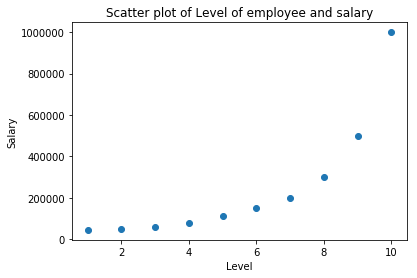

In [8]:
plt.scatter(X[:,1],y)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Scatter plot of Level of employee and salary')
plt.show()

In [14]:
#lets remove the first column as its redundant
X=dataset.iloc[:,1:2].values

In [15]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [16]:
X.shape

(10, 1)

In [17]:
y.shape

(10,)

In [18]:
#as the dataset is small lets not split into training and test set

In [19]:
#fitting linear regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [20]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
#fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)

In [23]:
X_poly=poly_reg.fit_transform(X)

In [24]:
X_poly.shape

(10, 3)

In [25]:
X.shape

(10, 1)

In [26]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [27]:
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [28]:
lin_reg2=LinearRegression()

In [29]:
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

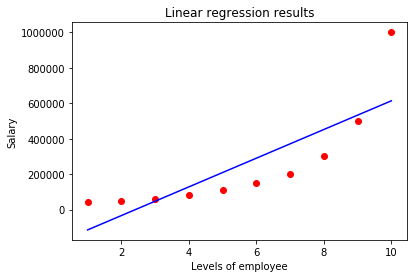

In [30]:
#visualising linear regression
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.xlabel('Levels of employee')
plt.ylabel('Salary')
plt.title('Linear regression results')
plt.show()

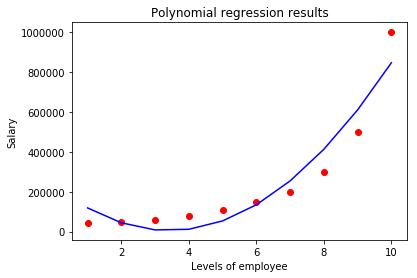

In [31]:
#visualising polynomial regression
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.xlabel('Levels of employee')
plt.ylabel('Salary')
plt.title('Polynomial regression results')
plt.show()

In [36]:
#lets build polynomial regression with greater degree
poly_reg2=PolynomialFeatures(degree=3)

In [37]:
X_poly2=poly_reg2.fit_transform(X)

In [38]:
X_poly2.shape

(10, 4)

In [39]:
print(X_poly2)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


In [40]:
lin_reg3=LinearRegression()

In [41]:
lin_reg3.fit(X_poly2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

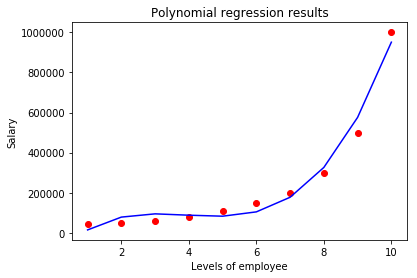

In [42]:
#visualising polynomial regression with degree3
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg3.predict(poly_reg2.fit_transform(X)),color='blue')
plt.xlabel('Levels of employee')
plt.ylabel('Salary')
plt.title('Polynomial regression results')
plt.show()

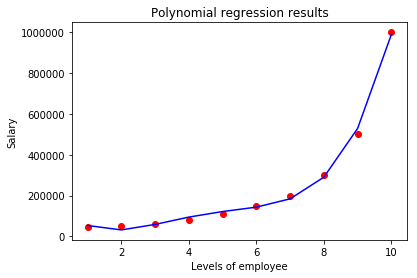

In [44]:
#with degree 4
poly_reg3=PolynomialFeatures(degree=4)
X_poly3=poly_reg3.fit_transform(X)
lin_reg4=LinearRegression()
lin_reg4.fit(X_poly3,y)

plt.scatter(X,y,color='red')
plt.plot(X,lin_reg4.predict(poly_reg3.fit_transform(X)),color='blue')
plt.xlabel('Levels of employee')
plt.ylabel('Salary')
plt.title('Polynomial regression results')
plt.show()

In [ ]:
#Lets improve the plot by improving the resolution

In [51]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
X_grid.shape

(90, 1)

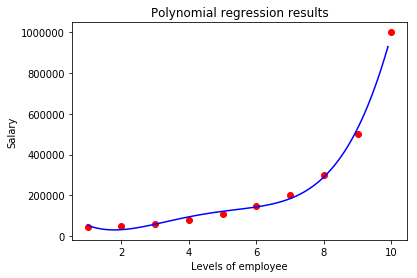

In [53]:
#with degree 4 but with more resolution
poly_reg4=PolynomialFeatures(degree=4)
X_poly4=poly_reg4.fit_transform(X)
lin_reg5=LinearRegression()
lin_reg5.fit(X_poly4,y)

plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg5.predict(poly_reg4.fit_transform(X_grid)),color='blue')
plt.xlabel('Levels of employee')
plt.ylabel('Salary')
plt.title('Polynomial regression results')
plt.show()

In [54]:
# let's predict a new result with linear regression
lin_reg.predict(6.5)

array([330378.78787879])

In [55]:
lin_reg5.predict(poly_reg4.fit_transform(6.5))

array([158862.45265153])